#  GRAPE calculation of control fields for cnot implementation

control-grape-cnot-explained

Robert Johansson (robert@riken.jp)

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [55]:
from qutip import *
from qutip.control import *

In [56]:
T = 2 * np.pi # total time allowed for evolution
times = np.linspace(0, T, 500) # vector of times at which discretization 
# is carried out

    class GRAPEResult:
    """
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [57]:
U = cnot()
R = 500
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()) +
         tensor(sigmay(), sigmay()) +
         tensor(sigmaz(), sigmaz())]



$Q$ = Identity in sigle qubit space.

$U = CNOT $   
$H_{ops} = [\sigma_{x} \otimes Q, \sigma_{y} \otimes Q,  \sigma_{z} \otimes Q, Q \otimes \sigma_{x}, Q \otimes \sigma_{y}, Q \otimes \sigma_{z}, \sigma_{x} \otimes \sigma_{x}, \sigma_{y} \otimes \sigma_{y}, \sigma_{z} \otimes \sigma_{z}, ] $


In [58]:
H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

In [59]:
H_labels

['$u_{1x}$',
 '$u_{1y}$',
 '$u_{1z}$',
 '$u_{2x}$',
 '$u_{1y}$',
 '$u_{2z}$',
 '$u_{xx}$',
 '$u_{yy}$',
 '$u_{zz}$']

In [60]:
H0 = 0 * np.pi * (tensor(sigmax(), identity(2)) + tensor(identity(2), sigmax()))

c_ops = []

$H_{0} = 0 * \pi (\sigma_{x} \otimes Q + Q \otimes \sigma_{x})$

    This is the analytical result in the absence of single-qubit tunnelling.
$g = \pi/(4 * T)$   
$H = g * (\sigma_{x} \otimes \sigma_{x}) + (\sigma_{y} \otimes \sigma_{y})) $

# GRAPE

## Imports

In [61]:
from qutip.control.grape import plot_grape_control_fields, _overlap 
from qutip.control.grape import grape_unitary_adaptive, cy_grape_unitary

In [62]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

## u0 initial

In [63]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 
               for _ in range(len(H_ops))])
u0

array([[0.30709218, 0.16047961, 0.11282962, ..., 0.24425614, 0.02838317,
        0.19538407],
       [0.01079487, 0.16733606, 0.28716718, ..., 0.31182426, 0.05563197,
        0.30035507],
       [0.2645381 , 0.06962187, 0.17119307, ..., 0.04801025, 0.09388006,
        0.18716874],
       ...,
       [0.18232474, 0.06419702, 0.06573442, ..., 0.02504288, 0.26534174,
        0.25600933],
       [0.10892898, 0.23393271, 0.02838375, ..., 0.08548959, 0.06560494,
        0.11218427],
       [0.25780132, 0.13482326, 0.00173173, ..., 0.2035682 , 0.13184603,
        0.17512466]])

In [64]:
len(u0)

7

In [65]:
len(u0[0])

500

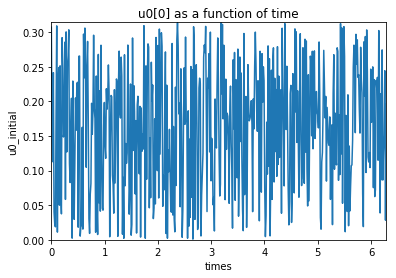

In [66]:
ax = plt.axes()
ax.plot(times, u0[0])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0_initial',
       title='u0[0] as a function of time');

## Plots of u0

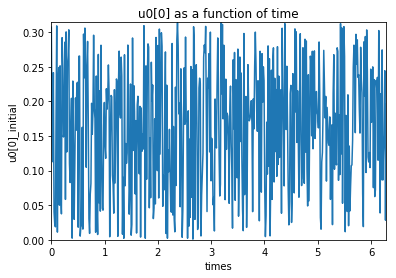

In [67]:
ax = plt.axes()
ax.plot(times, u0[0])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[0]_initial',
       title='u0[0] as a function of time');

In [ ]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

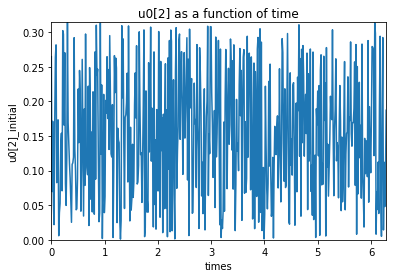

In [69]:
ax = plt.axes()
ax.plot(times, u0[2])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[2]_initial',
       title='u0[2] as a function of time');

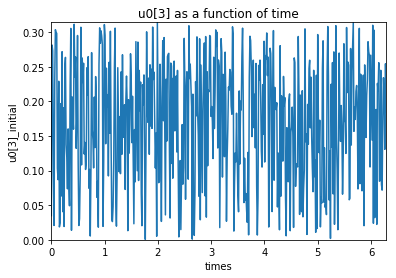

In [70]:
ax = plt.axes()
ax.plot(times, u0[3])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[3]_initial',
       title='u0[3] as a function of time');

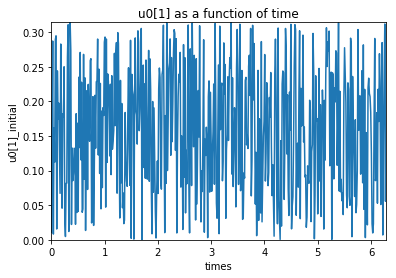

In [71]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

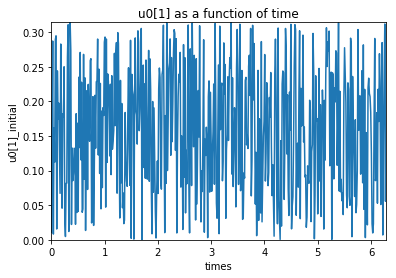

In [72]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

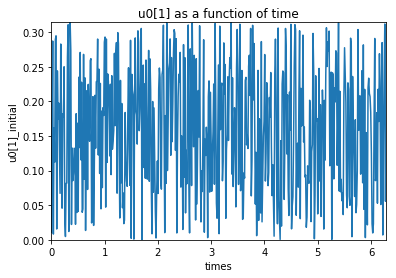

In [73]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

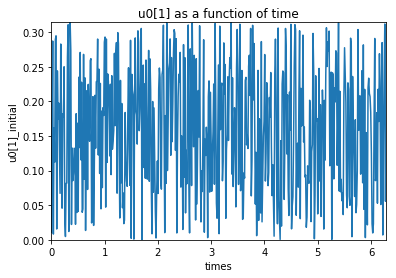

In [74]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

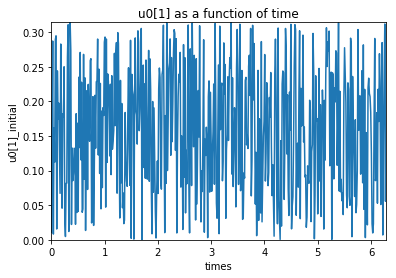

In [75]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

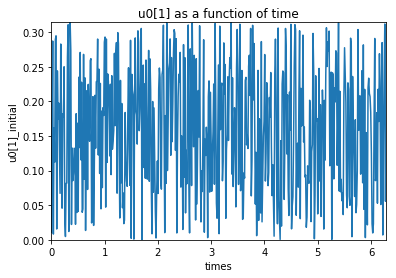

In [76]:
ax = plt.axes()
ax.plot(times, u0[1])
ax.set(xlim=(0, T), ylim=(0, 2 * np.pi * 0.05),
       xlabel='times', ylabel='u0[1]_initial',
       title='u0[1] as a function of time');

## u0 after convolution

In [77]:
u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same')
      for idx in range(len(H_ops))]
u0

[array([0.08621521, 0.088568  , 0.09044399, 0.10832289, 0.13922902,
        0.14034153, 0.13201035, 0.14084678, 0.13457217, 0.13555674,
        0.13834379, 0.13973978, 0.16706646, 0.17392993, 0.15787943,
        0.17246798, 0.17864064, 0.15959406, 0.18462408, 0.17218436,
        0.19046138, 0.2133198 , 0.21445504, 0.20072954, 0.19414704,
        0.19489593, 0.18678774, 0.1811874 , 0.17408694, 0.17527888,
        0.15314934, 0.1375595 , 0.12771841, 0.13253525, 0.14680002,
        0.15310771, 0.13448829, 0.16076889, 0.16438568, 0.15103447,
        0.15000451, 0.14100064, 0.13675268, 0.12246543, 0.12964671,
        0.13028517, 0.15905885, 0.15673477, 0.14065679, 0.16505614,
        0.19178649, 0.20730309, 0.19410247, 0.19347993, 0.17035133,
        0.1551105 , 0.14423704, 0.13527998, 0.1434411 , 0.1480679 ,
        0.13838007, 0.13835659, 0.13640679, 0.15914685, 0.157822  ,
        0.15043143, 0.15749299, 0.14759572, 0.15049238, 0.12507613,
        0.13421739, 0.12895867, 0.13239981, 0.11

## Explaining ulimits, alpha 

In [78]:
u_limits = None #[0, 1 * 2 * pi]
alpha = None

## understanding cy_grape_unitary

In [79]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time: 113.87s. Est. time left: 00:00:17:04
20.0%. Run time: 238.78s. Est. time left: 00:00:15:55
30.0%. Run time: 356.91s. Est. time left: 00:00:13:52
40.0%. Run time: 466.87s. Est. time left: 00:00:11:40
50.0%. Run time: 689.80s. Est. time left: 00:00:11:29
60.0%. Run time: 944.97s. Est. time left: 00:00:10:29
70.0%. Run time: 1171.49s. Est. time left: 00:00:08:22
80.0%. Run time: 1350.06s. Est. time left: 00:00:05:37
90.0%. Run time: 1505.53s. Est. time left: 00:00:02:47
Total run time: 1642.98s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

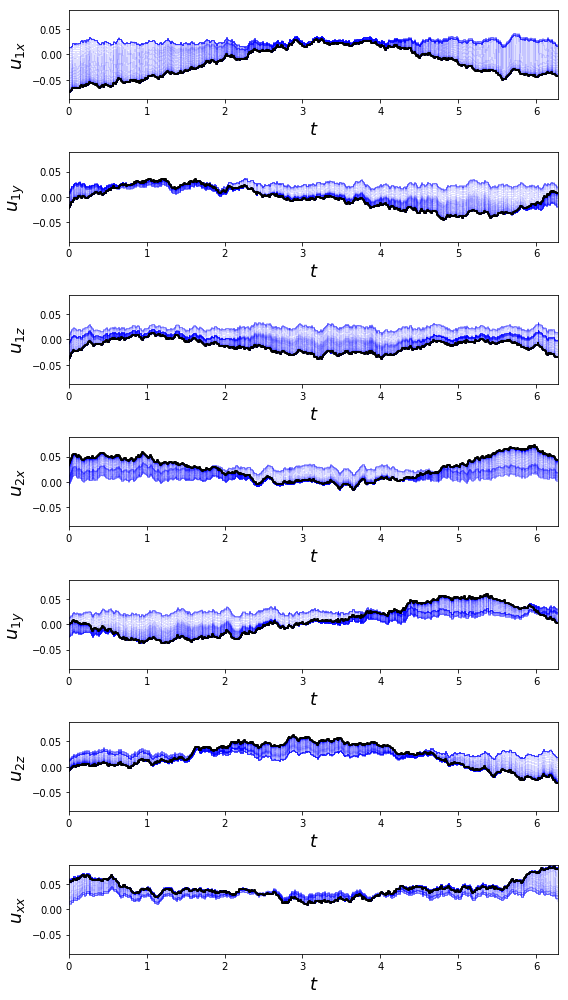

In [80]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [81]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [82]:
result.U_f

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-7.07106781e-01-7.07106781e-01j -5.82249955e-16+9.44508582e-16j
  -2.96279419e-16-1.33548297e-16j  5.46015510e-16+1.97427276e-16j]
 [-4.15941428e-16-6.16797388e-16j -7.07106781e-01-7.07106781e-01j
  -2.95336672e-16-1.20281389e-15j -3.88624645e-16-9.51524626e-16j]
 [ 2.49177234e-16-2.98214863e-16j -1.43866683e-15+3.59912770e-17j
   1.07509487e-15+2.68882139e-16j -7.07106781e-01-7.07106781e-01j]
 [ 7.35078909e-16+2.36805001e-17j -6.49220261e-16+8.18789481e-16j
  -7.07106781e-01-7.07106781e-01j -9.22439208e-16+2.06648934e-15j]]

In [83]:
result.U_f/result.U_f[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [84]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

(-0.7071067811865477, 0.9999999999999998)

## Test numerical integration of GRAPE pulse

In [85]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.18428516+0.21968187j  0.63267965-0.30770711j  0.48321254-0.17255917j
   0.05525907-0.3955883j ]
 [ 0.74473137-0.01271901j -0.10703752+0.57196941j  0.13157709-0.25326475j
  -0.15629236-0.0268615j ]
 [ 0.51752959+0.26413045j  0.23138339-0.26476668j -0.57392823+0.43327518j
   0.11635914+0.08998411j]
 [ 0.14263643+0.07103069j  0.01967954-0.20591212j  0.31230203-0.20154368j
   0.3560146 +0.81665446j]]

In [86]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j          0.59590264-2.38009465j  0.6219906 -1.67783032j
  -0.93309516-1.03428955j]
 [ 1.63520958-2.0183118j   1.28830466+1.56796258j -0.38177489-0.91920437j
  -0.42207325+0.35738279j]
 [ 1.86567208-0.79075215j -0.18880684-1.21165068j -0.12872301+2.50456032j
   0.50122315-0.10920861j]
 [ 0.50947883-0.22189834j -0.5060561 -0.51409873j  0.16148081-1.28614852j
   2.97991945+0.87918192j]]

In [87]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(-0.20965725176085984, 0.04490427838781553)

# Process tomography

## Ideal cnot gate

In [88]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

In [89]:
U_i_s = to_super(U)
U_i_s

Quantum object: dims = [[[2, 2], [2, 2]], [[2, 2], [2, 2]]], shape = (16, 16), type = super, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2320b5f8>)

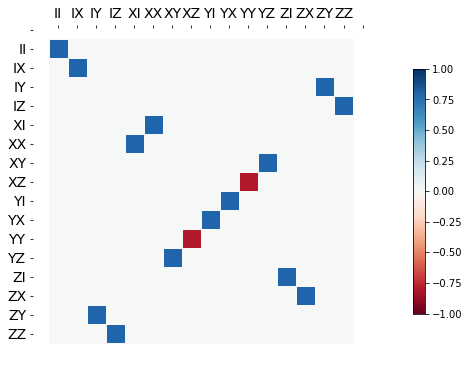

In [90]:
hinton(U_i_s)

In [91]:
chi = qpt(U_i_s, op_basis)
chi

array([[ 0.25+0.j,  0.25+0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,
         0.25+0.j, -0.25-0.j,  0.  +0.j,  0.  +0.j],
       [ 0.25+0.j,  0.25+0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,
         0.25+0.j, -0.25-0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  -0.j,  0.  +0.j,  0.  -0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  -0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  -0.j,
         0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,
         0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  -0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  -0.j,  0.  +0.j,  0.  +0.j,  0.  -0.j,  0.  +0.j,
         0.  -0.j,  0.  -0.j,  0.  +0.j,  0.  +0

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2320b198>)

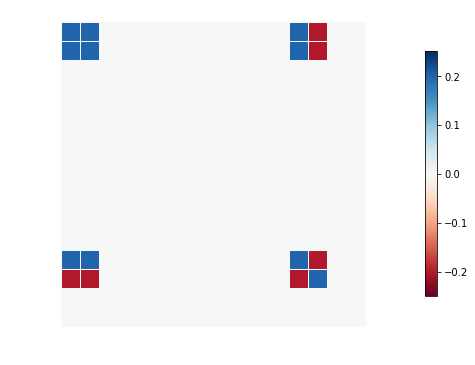

In [92]:
hinton(chi)

In [93]:
qpt_plot_combined

<function qutip.tomography.qpt_plot_combined(chi, lbls_list, title=None, fig=None, ax=None, figsize=(8, 6), threshold=None)>

In [94]:
fig = plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

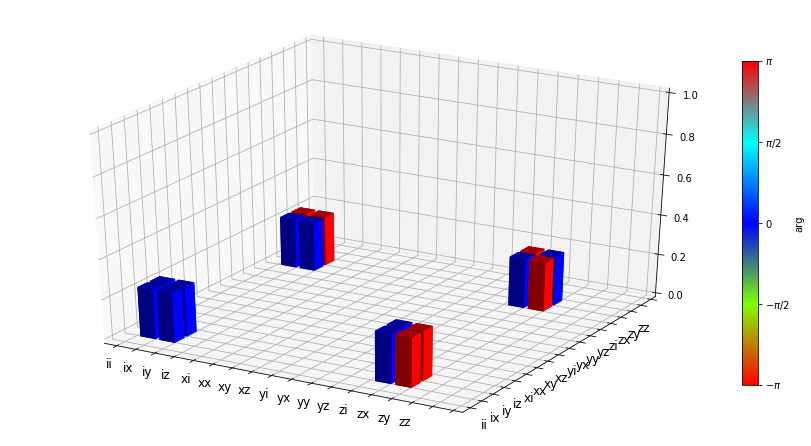

In [95]:
fig = plt.figure(figsize=(12,6))
fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

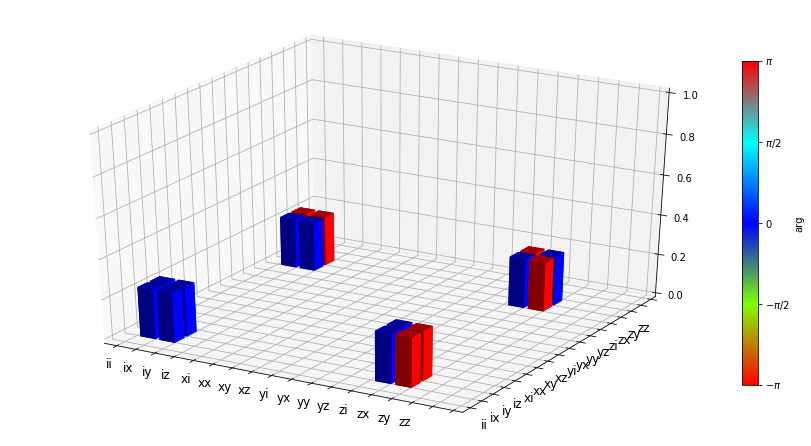

In [96]:
fig = plt.figure(figsize=(12,6))

U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [97]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.14.3
SciPy,1.1.0
matplotlib,3.0.2
Cython,0.28.1
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.3.1
Python,"3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]"
OS,posix [darwin]


# GRAPE.py file

__all__ = ['plot_grape_control_fields',
           'grape_unitary', 'cy_grape_unitary', 'grape_unitary_adaptive']

import warnings
import time
import numpy as np
from scipy.interpolate import interp1d
import scipy.sparse as sp

from qutip.qobj import Qobj
from qutip.ui.progressbar import BaseProgressBar
from qutip.control.cy_grape import cy_overlap, cy_grape_inner
from qutip.qip.gates import gate_sequence_product

import qutip.logging_utils
logger = qutip.logging_utils.get_logger()


class GRAPEResult:
    """
    Class for representing the result of a GRAPE simulation.
    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.
    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.
    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """
    def __init__(self, u=None, H_t=None, U_f=None):

        self.u = u
        self.H_t = H_t
        self.U_f = U_f


def plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.
    Parameters
    ----------
    times : array
        Time coordinate array.
    u : array
        Control pulse matrix.
    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.
    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """
    import matplotlib.pyplot as plt

    R, J, M = u.shape

    fig, axes = plt.subplots(J, 1, figsize=(8, 2 * J), squeeze=False)

    y_max = abs(u).max()

    for r in range(R):
        for j in range(J):

            if r == R - 1:
                lw, lc, alpha = 2.0, 'k', 1.0

                axes[j, 0].set_ylabel(labels[j], fontsize=18)
                axes[j, 0].set_xlabel(r'$t$', fontsize=18)
                axes[j, 0].set_xlim(0, times[-1])

            else:
                lw, lc, alpha = 0.5, 'b', 0.25

            axes[j, 0].step(times, u[r, j, :], lw=lw, color=lc, alpha=alpha)

            if uniform_axes:
                axes[j, 0].set_ylim(-y_max, y_max)

    fig.tight_layout()

    return fig, axes


def _overlap(A, B):
    return (A.dag() * B).tr() / A.shape[0]
    # return cy_overlap(A.data, B.data)


def grape_unitary(U, H0, H_ops, R, times, eps=None, u_start=None,
                  u_limits=None, interp_kind='linear', use_interp=False,
                  alpha=None, beta=None, phase_sensitive=True,
                  progress_bar=BaseProgressBar()):
    """
    Calculate control pulses for the Hamiltonian operators in H_ops so that the
    unitary U is realized.
    Experimental: Work in progress.
    Parameters
    ----------
    U : Qobj
        Target unitary evolution operator.
    H0 : Qobj
        Static Hamiltonian (that cannot be tuned by the control fields).
    H_ops: list of Qobj
        A list of operators that can be tuned in the Hamiltonian via the
        control fields.
    R : int
        Number of GRAPE iterations.
    time : array / list
        Array of time coordinates for control pulse evalutation.
    u_start : array
        Optional array with initial control pulse values.
    Returns
    -------
        Instance of GRAPEResult, which contains the control pulses calculated
        with GRAPE, a time-dependent Hamiltonian that is defined by the
        control pulses, as well as the resulting propagator.
    
    """

    if eps is None:
        eps = 0.1 * (2 * np.pi) / (times[-1])

    M = len(times)
    J = len(H_ops)

    u = np.zeros((R, J, M))

    if u_limits and len(u_limits) != 2:
        raise ValueError("u_limits must be a list with two values")

    if u_limits:
        warnings.warn("Caution: Using experimental feature u_limits")

    if u_limits and u_start:
        # make sure that no values in u0 violates the u_limits conditions
        u_start = np.array(u_start)
        u_start[u_start < u_limits[0]] = u_limits[0]
        u_start[u_start > u_limits[1]] = u_limits[1]

    if u_start is not None:
        for idx, u0 in enumerate(u_start):
            u[0, idx, :] = u0

    if beta:
        warnings.warn("Causion: Using experimental feature time-penalty")

    progress_bar.start(R)
    for r in range(R - 1):
        progress_bar.update(r)

        dt = times[1] - times[0]

        if use_interp:
            ip_funcs = [interp1d(times, u[r, j, :], kind=interp_kind,
                                 bounds_error=False, fill_value=u[r, j, -1])
                        for j in range(J)]

            def _H_t(t, args=None):
                return H0 + sum([float(ip_funcs[j](t)) * H_ops[j]
                                 for j in range(J)])

            U_list = [(-1j * _H_t(times[idx]) * dt).expm()
                      for idx in range(M-1)]

        else:
            def _H_idx(idx):
                return H0 + sum([u[r, j, idx] * H_ops[j] for j in range(J)])

            U_list = [(-1j * _H_idx(idx) * dt).expm() for idx in range(M-1)]

        U_f_list = []
        U_b_list = []

        U_f = 1
        U_b = 1
        for n in range(M - 1):

            U_f = U_list[n] * U_f
            U_f_list.append(U_f)

            U_b_list.insert(0, U_b)
            U_b = U_list[M - 2 - n].dag() * U_b

        for j in range(J):
            for m in range(M-1):
                P = U_b_list[m] * U
                Q = 1j * dt * H_ops[j] * U_f_list[m]

                if phase_sensitive:
                    du = - _overlap(P, Q)
                else:
                    du = - 2 * _overlap(P, Q) * _overlap(U_f_list[m], P)

                if alpha:
                    # penalty term for high power control signals u
                    du += -2 * alpha * u[r, j, m] * dt

                if beta:
                    # penalty term for late control signals u
                    du += -2 * beta * m * u[r, j, m] * dt

                u[r + 1, j, m] = u[r, j, m] + eps * du.real

                if u_limits:
                    if u[r + 1, j, m] < u_limits[0]:
                        u[r + 1, j, m] = u_limits[0]
                    elif u[r + 1, j, m] > u_limits[1]:
                        u[r + 1, j, m] = u_limits[1]

            u[r + 1, j, -1] = u[r + 1, j, -2]

    if use_interp:
        ip_funcs = [interp1d(times, u[R - 1, j, :], kind=interp_kind,
                             bounds_error=False, fill_value=u[R - 1, j, -1])
                    for j in range(J)]

        H_td_func = [H0] + [[H_ops[j], lambda t, args, j=j: ip_funcs[j](t)]
                            for j in range(J)]
    else:
        H_td_func = [H0] + [[H_ops[j], u[-1, j, :]] for j in range(J)]

    progress_bar.finished()

    # return U_f_list[-1], H_td_func, u
    return GRAPEResult(u=u, U_f=U_f_list[-1], H_t=H_td_func)


def cy_grape_unitary(U, H0, H_ops, R, times, eps=None, u_start=None,
                     u_limits=None, interp_kind='linear', use_interp=False,
                     alpha=None, beta=None, phase_sensitive=True,
                     progress_bar=BaseProgressBar()):
    """
    Calculate control pulses for the Hamitonian operators in H_ops so that the
    unitary U is realized.
    Experimental: Work in progress.
    Parameters
    ----------
    U : Qobj
        Target unitary evolution operator.
    H0 : Qobj
        Static Hamiltonian (that cannot be tuned by the control fields).
    H_ops: list of Qobj
        A list of operators that can be tuned in the Hamiltonian via the
        control fields.
    R : int
        Number of GRAPE iterations.
    time : array / list
        Array of time coordinates for control pulse evalutation.
    u_start : array
        Optional array with initial control pulse values.
    Returns
    -------
        Instance of GRAPEResult, which contains the control pulses calculated
        with GRAPE, a time-dependent Hamiltonian that is defined by the
        control pulses, as well as the resulting propagator.
    
    """

    if eps is None:
        eps = 0.1 * (2 * np.pi) / (times[-1])

    M = len(times)
    J = len(H_ops)

    u = np.zeros((R, J, M))

    H_ops_data = [H_op.data for H_op in H_ops]

    if u_limits and len(u_limits) != 2:
        raise ValueError("u_limits must be a list with two values")

    if u_limits:
        warnings.warn("Causion: Using experimental feature u_limits")

    if u_limits and u_start:
        # make sure that no values in u0 violates the u_limits conditions
        u_start = np.array(u_start)
        u_start[u_start < u_limits[0]] = u_limits[0]
        u_start[u_start > u_limits[1]] = u_limits[1]

    if u_limits:
        use_u_limits = 1
        u_min = u_limits[0]
        u_max = u_limits[1]
    else:
        use_u_limits = 0
        u_min = 0.0
        u_max = 0.0

    if u_start is not None:
        for idx, u0 in enumerate(u_start):
            u[0, idx, :] = u0

    if beta:
        warnings.warn("Causion: Using experimental feature time-penalty")

    alpha_val = alpha if alpha else 0.0
    beta_val = beta if beta else 0.0

    progress_bar.start(R)
    for r in range(R - 1):
        progress_bar.update(r)

        dt = times[1] - times[0]

        if use_interp:
            ip_funcs = [interp1d(times, u[r, j, :], kind=interp_kind,
                                 bounds_error=False, fill_value=u[r, j, -1])
                        for j in range(J)]

            def _H_t(t, args=None):
                return H0 + sum([float(ip_funcs[j](t)) * H_ops[j]
                                 for j in range(J)])

            U_list = [(-1j * _H_t(times[idx]) * dt).expm().data
                      for idx in range(M-1)]

        else:
            def _H_idx(idx):
                return H0 + sum([u[r, j, idx] * H_ops[j] for j in range(J)])

            U_list = [(-1j * _H_idx(idx) * dt).expm().data
                      for idx in range(M-1)]

        U_f_list = []
        U_b_list = []

        U_f = 1
        U_b = sp.eye(*(U.shape))
        for n in range(M - 1):

            U_f = U_list[n] * U_f
            U_f_list.append(U_f)

            U_b_list.insert(0, U_b)
            U_b = U_list[M - 2 - n].T.conj().tocsr() * U_b

        cy_grape_inner(U.data, u, r, J, M, U_b_list, U_f_list, H_ops_data,
                       dt, eps, alpha_val, beta_val, phase_sensitive,
                       use_u_limits, u_min, u_max)

    if use_interp:
        ip_funcs = [interp1d(times, u[R - 1, j, :], kind=interp_kind,
                             bounds_error=False, fill_value=u[R - 1, j, -1])
                    for j in range(J)]

        H_td_func = [H0] + [[H_ops[j], lambda t, args, j=j: ip_funcs[j](t)]
                            for j in range(J)]
    else:
        H_td_func = [H0] + [[H_ops[j], u[-1, j, :]] for j in range(J)]

    progress_bar.finished()

    return GRAPEResult(u=u, U_f=Qobj(U_f_list[-1], dims=U.dims),
                       H_t=H_td_func)


def grape_unitary_adaptive(U, H0, H_ops, R, times, eps=None, u_start=None,
                           u_limits=None, interp_kind='linear',
                           use_interp=False, alpha=None, beta=None,
                           phase_sensitive=False, overlap_terminate=1.0,
                           progress_bar=BaseProgressBar()):
    """
    Calculate control pulses for the Hamiltonian operators in H_ops so that
    the unitary U is realized.
    Experimental: Work in progress.
    Parameters
    ----------
    U : Qobj
        Target unitary evolution operator.
    H0 : Qobj
        Static Hamiltonian (that cannot be tuned by the control fields).
    H_ops: list of Qobj
        A list of operators that can be tuned in the Hamiltonian via the
        control fields.
    R : int
        Number of GRAPE iterations.
    time : array / list
        Array of time coordinates for control pulse evalutation.
    u_start : array
        Optional array with initial control pulse values.
    Returns
    -------
        Instance of GRAPEResult, which contains the control pulses calculated
        with GRAPE, a time-dependent Hamiltonian that is defined by the
        control pulses, as well as the resulting propagator.
    
    """

    if eps is None:
        eps = 0.1 * (2 * np.pi) / (times[-1])

    eps_vec = np.array([eps / 2, eps, 2 * eps])
    eps_log = np.zeros(R)
    overlap_log = np.zeros(R)

    best_k = 0
    _k_overlap = np.array([0.0, 0.0, 0.0])

    M = len(times)
    J = len(H_ops)
    K = len(eps_vec)
    Uf = [None for _ in range(K)]

    u = np.zeros((R, J, M, K))

    if u_limits and len(u_limits) != 2:
        raise ValueError("u_limits must be a list with two values")

    if u_limits:
        warnings.warn("Causion: Using experimental feature u_limits")

    if u_limits and u_start:
        # make sure that no values in u0 violates the u_limits conditions
        u_start = np.array(u_start)
        u_start[u_start < u_limits[0]] = u_limits[0]
        u_start[u_start > u_limits[1]] = u_limits[1]

    if u_start is not None:
        for idx, u0 in enumerate(u_start):
            for k in range(K):
                u[0, idx, :, k] = u0

    if beta:
        warnings.warn("Causion: Using experimental feature time-penalty")

    if phase_sensitive:
        _fidelity_function = lambda x: x
    else:
        _fidelity_function = lambda x: abs(x) ** 2

    best_k = 1
    _r = 0
    _prev_overlap = 0

    progress_bar.start(R)
    for r in range(R - 1):
        progress_bar.update(r)

        _r = r
        eps_log[r] = eps_vec[best_k]

        logger.debug("eps_vec: {}".format(eps_vec))

        _t0 = time.time()

        dt = times[1] - times[0]

        if use_interp:
            ip_funcs = [interp1d(times, u[r, j, :, best_k], kind=interp_kind,
                                 bounds_error=False,
                                 fill_value=u[r, j, -1, best_k])
                        for j in range(J)]

            def _H_t(t, args=None):
                return H0 + sum([float(ip_funcs[j](t)) * H_ops[j]
                                 for j in range(J)])

            U_list = [(-1j * _H_t(times[idx]) * dt).expm()
                      for idx in range(M-1)]

        else:
            def _H_idx(idx):
                return H0 + sum([u[r, j, idx, best_k] * H_ops[j]
                                 for j in range(J)])

            U_list = [(-1j * _H_idx(idx) * dt).expm() for idx in range(M-1)]

        logger.debug("Time 1: %fs" % (time.time() - _t0))
        _t0 = time.time()

        U_f_list = []
        U_b_list = []

        U_f = 1
        U_b = 1
        for m in range(M - 1):

            U_f = U_list[m] * U_f
            U_f_list.append(U_f)

            U_b_list.insert(0, U_b)
            U_b = U_list[M - 2 - m].dag() * U_b

        logger.debug("Time 2: %fs" % (time.time() - _t0))
        _t0 = time.time()

        for j in range(J):
            for m in range(M-1):
                P = U_b_list[m] * U
                Q = 1j * dt * H_ops[j] * U_f_list[m]

                if phase_sensitive:
                    du = - cy_overlap(P.data, Q.data)
                else:
                    du = (- 2 * cy_overlap(P.data, Q.data) *
                          cy_overlap(U_f_list[m].data, P.data))

                if alpha:
                    # penalty term for high power control signals u
                    du += -2 * alpha * u[r, j, m, best_k] * dt

                if beta:
                    # penalty term for late control signals u
                    du += -2 * beta * k ** 2 * u[r, j, k] * dt

                for k, eps_val in enumerate(eps_vec):
                    u[r + 1, j, m, k] = u[r, j, m, k] + eps_val * du.real

                    if u_limits:
                        if u[r + 1, j, m, k] < u_limits[0]:
                            u[r + 1, j, m, k] = u_limits[0]
                        elif u[r + 1, j, m, k] > u_limits[1]:
                            u[r + 1, j, m, k] = u_limits[1]

            u[r + 1, j, -1, :] = u[r + 1, j, -2, :]

        logger.debug("Time 3: %fs" % (time.time() - _t0))
        _t0 = time.time()

        for k, eps_val in enumerate(eps_vec):

            def _H_idx(idx):
                return H0 + sum([u[r + 1, j, idx, k] * H_ops[j]
                                 for j in range(J)])

            U_list = [(-1j * _H_idx(idx) * dt).expm() for idx in range(M-1)]

            Uf[k] = gate_sequence_product(U_list)
            _k_overlap[k] = _fidelity_function(cy_overlap(Uf[k].data,
                                                          U.data)).real

        best_k = np.argmax(_k_overlap)
        logger.debug("k_overlap: ", _k_overlap, best_k)

        if _prev_overlap > _k_overlap[best_k]:
            logger.debug("Regression, stepping back with smaller eps.")

            u[r + 1, :, :, :] = u[r, :, :, :]
            eps_vec /= 2
        else:

            if best_k == 0:
                eps_vec /= 2

            elif best_k == 2:
                eps_vec *= 2

            _prev_overlap = _k_overlap[best_k]

        overlap_log[r] = _k_overlap[best_k]

        if overlap_terminate < 1.0:
            if _k_overlap[best_k] > overlap_terminate:
                logger.info("Reached target fidelity, terminating.")
                break

        logger.debug("Time 4: %fs" % (time.time() - _t0))
        _t0 = time.time()

    if use_interp:
        ip_funcs = [interp1d(times, u[_r, j, :, best_k], kind=interp_kind,
                             bounds_error=False, fill_value=u[R - 1, j, -1])
                    for j in range(J)]

        H_td_func = [H0] + [[H_ops[j], lambda t, args, j=j: ip_funcs[j](t)]
                            for j in range(J)]
    else:
        H_td_func = [H0] + [[H_ops[j], u[_r, j, :, best_k]] for j in range(J)]

    progress_bar.finished()

    result = GRAPEResult(u=u[:_r, :, :, best_k], U_f=Uf[best_k],
                         H_t=H_td_func)

    result.eps = eps_log
    result.overlap = overlap_log

    return result